In [1]:
import cv2
import numpy as np

from src.helper import crop_image
from face_recognition_inference import run_fr

import matplotlib.pyplot as plt

2025-03-03 11:34:32.841852: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 11:34:32.843207: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 11:34:32.868611: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 11:34:32.869441: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 11:34:33.425509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [113]:
def blur_image(image, points: list):
    x, y, w, h = points
    roi = image[y:y+h, x:x+w]

    # Apply Gaussian Blur
    blurred_roi = cv2.blur(roi, (200, 200), 0)

    # Replace the original region with blurred region
    image[y:y+h, x:x+w] = blurred_roi
    
    return image

In [130]:
path = "./images/manas.jpg"

image = cv2.imread(path)

face_bb, face_rec, face_rec_score, simi_df = run_fr(
    image
)


1/1 [==============================] - 0s 56ms/step
[[[[ 26  31  29]
   [ 25  30  28]
   [ 25  30  28]
   ...
   [ 41  46  45]
   [ 43  47  48]
   [ 45  49  50]]

  [[ 25  30  28]
   [ 25  30  28]
   [ 25  30  28]
   ...
   [ 42  46  45]
   [ 43  47  48]
   [ 45  49  50]]

  [[ 25  30  28]
   [ 24  30  28]
   [ 24  29  27]
   ...
   [ 41  45  45]
   [ 42  46  47]
   [ 43  47  48]]

  ...

  [[ 16  23  19]
   [ 16  23  18]
   [ 19  27  24]
   ...
   [179 187 199]
   [180 188 200]
   [181 189 201]]

  [[ 14  23  17]
   [ 13  22  17]
   [ 16  24  22]
   ...
   [183 190 203]
   [183 190 203]
   [183 190 203]]

  [[ 15  25  19]
   [ 14  24  18]
   [ 15  25  23]
   ...
   [184 190 203]
   [182 188 201]
   [183 189 202]]]]


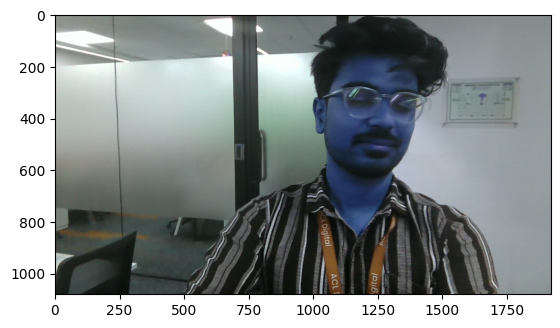

In [131]:
plt.imshow(image)

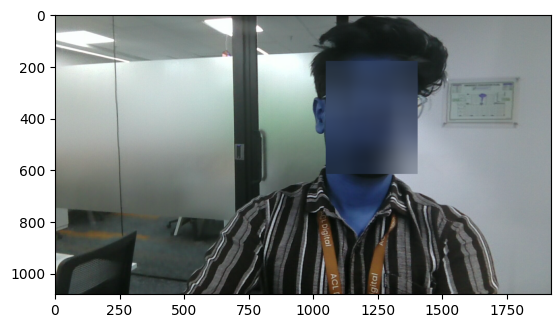

In [132]:
plt.imshow(
    blur_image(image, list(np.array(face_bb[0]) + 5))
)

In [1]:
import numpy as np

In [2]:
np.load("face_vectors_collected.npy", allow_pickle=True).item()

{'face_vectors': array([[2.67339144e-02, 2.99868798e+00, 1.22916651e+00, ...,
         1.35630894e+00, 1.86465471e-03, 1.97452139e-02],
        [1.44099947e-02, 4.32973671e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 4.18924236e+00],
        [0.00000000e+00, 5.73892295e-01, 7.83901739e+00, ...,
         8.59222189e-02, 9.48010325e-01, 1.83148552e-02],
        ...,
        [0.00000000e+00, 4.44589233e+00, 2.83045739e-01, ...,
         0.00000000e+00, 5.54964989e-02, 2.53371143e+00],
        [1.54118419e-01, 5.15275431e+00, 6.71910048e-02, ...,
         5.37107086e+00, 0.00000000e+00, 0.00000000e+00],
        [2.55054384e-01, 2.64828467e+00, 3.21680832e+00, ...,
         1.99126756e+00, 6.09759986e-01, 0.00000000e+00]]),
 'labels': array(['ankit', 'vedanshi', 'snehashish', 'sushant', 'aditi', 'matty',
        'prafull', 'shubham', 'sanchi', 'prajwal', 'manas'], dtype='<U32')}

In [33]:
from src.helper import crop_image

In [80]:
np.save("face_vectors_mediapipe.npy", {'face_vectors': np.array([]), 'labels': np.array([])})

In [81]:
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=5, refine_landmarks=True)

I0000 00:00:1740593787.538486  163510 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1740593787.541647  168909 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.1), renderer: Mesa Intel(R) Graphics (MTL)


W0000 00:00:1740593787.547293  168900 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740593787.565436  168893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [84]:
loaded_data = np.load("./face_vectors_mediapipe.npy", allow_pickle=True).item()
loaded_data

{'face_vectors': array([[ 0.58544338,  0.31604376, -0.01305324, ...,  0.60812163,
          0.24070759,  0.0053359 ],
        [ 0.47297254,  0.50464088, -0.03174773, ...,  0.51428568,
          0.38906932,  0.01442076],
        [ 0.57452929,  0.56035411, -0.02217408, ...,  0.61352652,
          0.43578088,  0.00958411],
        ...,
        [ 0.43402714,  0.49084452, -0.01313805, ...,  0.45301318,
          0.40969312,  0.00605245],
        [ 0.57198119,  0.57586461, -0.01197691, ...,  0.62197912,
          0.47159678, -0.00221737],
        [ 0.65800041,  0.45037603, -0.0229417 , ...,  0.69515491,
          0.34592634,  0.01945681]]),
 'labels': array(['ankit', 'vedanshi', 'snehashish', 'sushant', 'aditi', 'matty',
        'prafull', 'sanchi', 'prajwal', 'manas'], dtype='<U32')}

In [ ]:
# import os
# for name in os.listdir("./images"):
#     image = cv2.imread(f"./images/{name}")
#     results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     detected_faces = []

#     if results.multi_face_landmarks:
#         for face_landmarks in results.multi_face_landmarks:
#             # Extract 468 facial landmarks as (x, y, z)
#             face_vector = np.array([(lm.x, lm.y, lm.z) for lm in face_landmarks.landmark]).flatten()
#             print(face_vector, name.split(".")[0])

#             face_vector= face_vector.reshape(1, -1)

#             print(face_vector)

#             loaded_data = np.load("./face_vectors_mediapipe.npy", allow_pickle=True).item()
#             appended_fvs = np.concatenate((loaded_data['face_vectors'].reshape(-1, face_vector.shape[1]), face_vector), axis=0)
#             appended_labels = np.concatenate((loaded_data['labels'], np.array([name.split(".")[0]])), axis=0)

#             appended_data = {"face_vectors" : appended_fvs, "labels" : appended_labels}
#             np.save("./face_vectors_mediapipe.npy", appended_data)

[ 0.58544338  0.31604376 -0.01305324 ...  0.60812163  0.24070759
  0.0053359 ] ankit
[[ 0.58544338  0.31604376 -0.01305324 ...  0.60812163  0.24070759
   0.0053359 ]]
[ 0.47297254  0.50464088 -0.03174773 ...  0.51428568  0.38906932
  0.01442076] vedanshi
[[ 0.47297254  0.50464088 -0.03174773 ...  0.51428568  0.38906932
   0.01442076]]
[ 0.57452929  0.56035411 -0.02217408 ...  0.61352652  0.43578088
  0.00958411] snehashish
[[ 0.57452929  0.56035411 -0.02217408 ...  0.61352652  0.43578088
   0.00958411]]
[ 0.6201964   0.62351578 -0.01585373 ...  0.649055    0.53429323
  0.00799511] sushant
[[ 0.6201964   0.62351578 -0.01585373 ...  0.649055    0.53429323
   0.00799511]]
[ 0.41036215  0.43118078 -0.02073359 ...  0.43541643  0.33789665
  0.01148301] aditi
[[ 0.41036215  0.43118078 -0.02073359 ...  0.43541643  0.33789665
   0.01148301]]
[ 0.69843584  0.44066712 -0.01982425 ...  0.72731876  0.33577618
  0.00909951] matty
[[ 0.69843584  0.44066712 -0.01982425 ...  0.72731876  0.33577618
   0

In [5]:
import numpy as np

In [6]:
# np.save("./detailed_data.npy", {'face_vectors': np.array([]), 'labels': np.array([]), 'age' : np.array([]), 'gender' : np.array([])})

In [7]:
np.load("./db/detailed_data.npy", allow_pickle=True)

array({'face_vectors': array([[0.        , 1.91680515, 0.03617927, ..., 3.38451862, 1.99398208,
        8.87965393],
       [0.        , 0.        , 0.10470625, ..., 8.86990452, 0.        ,
        0.        ],
       [0.13190834, 1.07680833, 0.06010326, ..., 0.        , 0.        ,
        0.08155975],
       ...,
       [0.        , 4.89452887, 0.        , ..., 0.        , 0.        ,
        3.33791113],
       [0.01822553, 4.560287  , 0.58389992, ..., 0.        , 0.14889494,
        6.85401201],
       [0.0703786 , 0.03194475, 2.60156798, ..., 6.57483959, 0.58357024,
        0.        ]]), 'labels': array(['aditi', 'prafull', 'tejashri', 'prajwal', 'matty', 'satya',
       'manas', 'sushantm', 'ankit', 'vedanshi', 'sanchi', 'shubham'],
      dtype='<U32'), 'age': array([21., 21., 32., 21., 21., 25., 21., 21., 25., 21., 21., 21.]), 'gender': array(['Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male'], dtype='<U32')}, dtype=ob

In [8]:
a = "Unknown"

print(a is "Unknown")
print(a == "Unknown")

True
True


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_431582/896927175.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print(a is "Unknown")
